<a href="https://colab.research.google.com/github/SiMori92/reddit-NLP/blob/main/Step2_Inspection_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Content

1. check on consol data
  - number of sample: 195
  - missing 8-10 Feb 2023
2. Remove duplicate date
3. Inspect the raw comments
  - features
    1. meta features
    2. Embeddings
      - Load the 2 popular embedding
      - Embeddings Coverage
      - generating the oov -> then check coverage
    3. N-gram analysis (for sentiment analysis)
      - uni
      - bi
      - tri
    4. (need further data)sentiment distribution
    5. (need further data)topic distribution (topic modeling algorithms (e.g., LDA, NMF))
  - labels
4. map to labels

##1. check on consol data

In [1]:
# import library

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
import string

import gc
import operator

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# popular Libraries for text preprocessing.

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score

!pip install bert-tensorflow
from bert import tokenization

from collections import defaultdict

import seaborn as sns

from wordcloud import STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.1 MB/s eta 0:00:00


In [2]:
#check on consol df
#load excel

consol_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CUSCS/CUSCS - final project/data/consol_Reddit_df_unique_Oct22-Jun23.csv", index_col=0)
consol_df

,date,comments
0,2022-07-13,This week's [Earnings Thread](https://www.redd...
1,2022-07-14,This week's [Earnings Thread](https://www.redd...
2,2022-07-15,Cashed out up 56k today. Now cuddled up watchi...
3,2022-07-19,This week's [Earnings Thread](https://www.redd...
4,2022-07-20,If 2008 was the Great Recession\n\nThen 2022 i...
...,...,...
187,2023-06-26,I was holding puts over the weekend. Thought f...
188,2023-06-27,I watched TSLA rise for 3 months. 3 months. 3 ...
189,2023-06-28,Trades when I 15x: $300 invested\n\nTrades whe...
190,2023-06-29,That closing green candle was like a 5 trillio...


##2. Remove duplicate date

In [ ]:
# merge the rows with same date

consol_Reddit_df_unique = consol_df.groupby('date').agg({
    'Comment Body': ' '.join,
    'Comment Length': 'sum'
  }).reset_index()

consol_Reddit_df_unique

,date,comments
0,2022-07-13,This week's [Earnings Thread](https://www.redd...
1,2022-07-14,This week's [Earnings Thread](https://www.redd...
2,2022-07-15,Cashed out up 56k today. Now cuddled up watchi...
3,2022-07-19,This week's [Earnings Thread](https://www.redd...
4,2022-07-20,If 2008 was the Great Recession\n\nThen 2022 i...
5,2022-07-21,airbnb is more expensive than hotels\n\nuber i...
6,2022-07-25,I got a free share of SIRI when I signed up fo...
7,2022-07-26,Whoever yolo’d 13k contracts of walmart 130 pu...
8,2022-07-27,I have google puts and msft calls 🤡 I had a se...
9,2022-07-28,"META ER will be hilarious\n\n""yeah we're tryin..."


In [ ]:
# consistent the datetime format with market data
# convert the date format
consol_Reddit_df_unique['date'] = pd.to_datetime(consol_Reddit_df_unique['date']).dt.strftime('%Y-%m-%d')

In [ ]:
# save a copy of merge the rows with same date

consol_Reddit_df_unique.to_csv("consol_Reddit_df_unique.csv")

##3. Raw data inspection
  - features
    1. meta features
    2. Embeddings
      - Load the 2 popular embedding
      - Embeddings Coverage
      - generating the oov -> then check coverage
    3. N-gram analysis (for sentiment analysis)
      - uni
      - bi
      - tri
    4. (need further data)sentiment distribution
    5. (need further data)topic distribution (topic modeling algorithms (e.g., LDA, NMF))
  - labels

In [ ]:
# post length distribution vs market index movement

In [ ]:
# new threads in wsb community last 24 hours vs market index movement

In [ ]:
# number of active users left comment distribution vs market index movement

In [6]:
# split training set & testing set

train_df = consol_df[:150].reset_index()

test_df = consol_df[501:191].reset_index()

# test_df = pd.concat([consol_df.iloc[:40], consol_df.iloc[111:]]).reset_index()

train_df

,index,date,comments
0,0,2022-07-13,This week's [Earnings Thread](https://www.redd...
1,1,2022-07-14,This week's [Earnings Thread](https://www.redd...
2,2,2022-07-15,Cashed out up 56k today. Now cuddled up watchi...
3,3,2022-07-19,This week's [Earnings Thread](https://www.redd...
4,4,2022-07-20,If 2008 was the Great Recession\n\nThen 2022 i...
...,...,...,...
145,145,2023-04-24,#And my $25K in towel stock are all gone…… jus...
146,146,2023-04-25,"Phone is glitched, FRC not showing $110 If I d..."
147,147,2023-04-26,"6 months ago, I couldn’t even afford to get gu..."
148,148,2023-04-27,META up 135% since Cramer cried on live TV and...


##3.1. Meta Features (understand the structure)

In [7]:
# 2. Meta Features (understand the structure between training & test dataset)

METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
               'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']

# word_count
train_df['word_count'] = train_df['comments'].apply(lambda x: len(str(x).split()))

# unique_word_count
train_df['unique_word_count'] = train_df['comments'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
train_df['stop_word_count'] = train_df['comments'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
train_df['url_count'] = train_df['comments'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
train_df['mean_word_length'] = train_df['comments'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
train_df['char_count'] = train_df['comments'].apply(lambda x: len(str(x)))

# punctuation_count
train_df['punctuation_count'] = train_df['comments'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
train_df['hashtag_count'] = train_df['comments'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
train_df['mention_count'] = train_df['comments'].apply(lambda x: len([c for c in str(x) if c == '@']))


In [8]:
train_df.describe()

,index,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
count,150.000000,150.000000,150.00000,150.000000,150.00000,150.000000,1.500000e+02,150.000000,150.000000,150.000000
mean,74.500000,102119.253333,18488.94000,41624.446667,266.66000,4.909270,6.047974e+05,32381.900000,178.126667,64.620000
std,43.445368,27874.044127,2886.57781,11331.778135,133.24569,0.113007,1.619522e+05,8196.837138,52.253807,23.181128
min,0.000000,51098.000000,12257.00000,20397.000000,79.00000,4.690544,3.233450e+05,17106.000000,85.000000,4.000000
25%,37.250000,82546.500000,16644.00000,33737.750000,152.25000,4.830033,4.861332e+05,26440.750000,143.000000,48.000000
50%,74.500000,96224.500000,17922.50000,38599.000000,247.00000,4.902583,5.721705e+05,31984.000000,172.000000,60.500000
75%,111.750000,119765.750000,20738.75000,48327.750000,366.50000,4.964343,7.122232e+05,36787.000000,200.500000,78.000000
max,149.000000,204371.000000,27523.00000,82978.000000,949.00000,5.612204,1.213525e+06,60917.000000,381.000000,138.000000


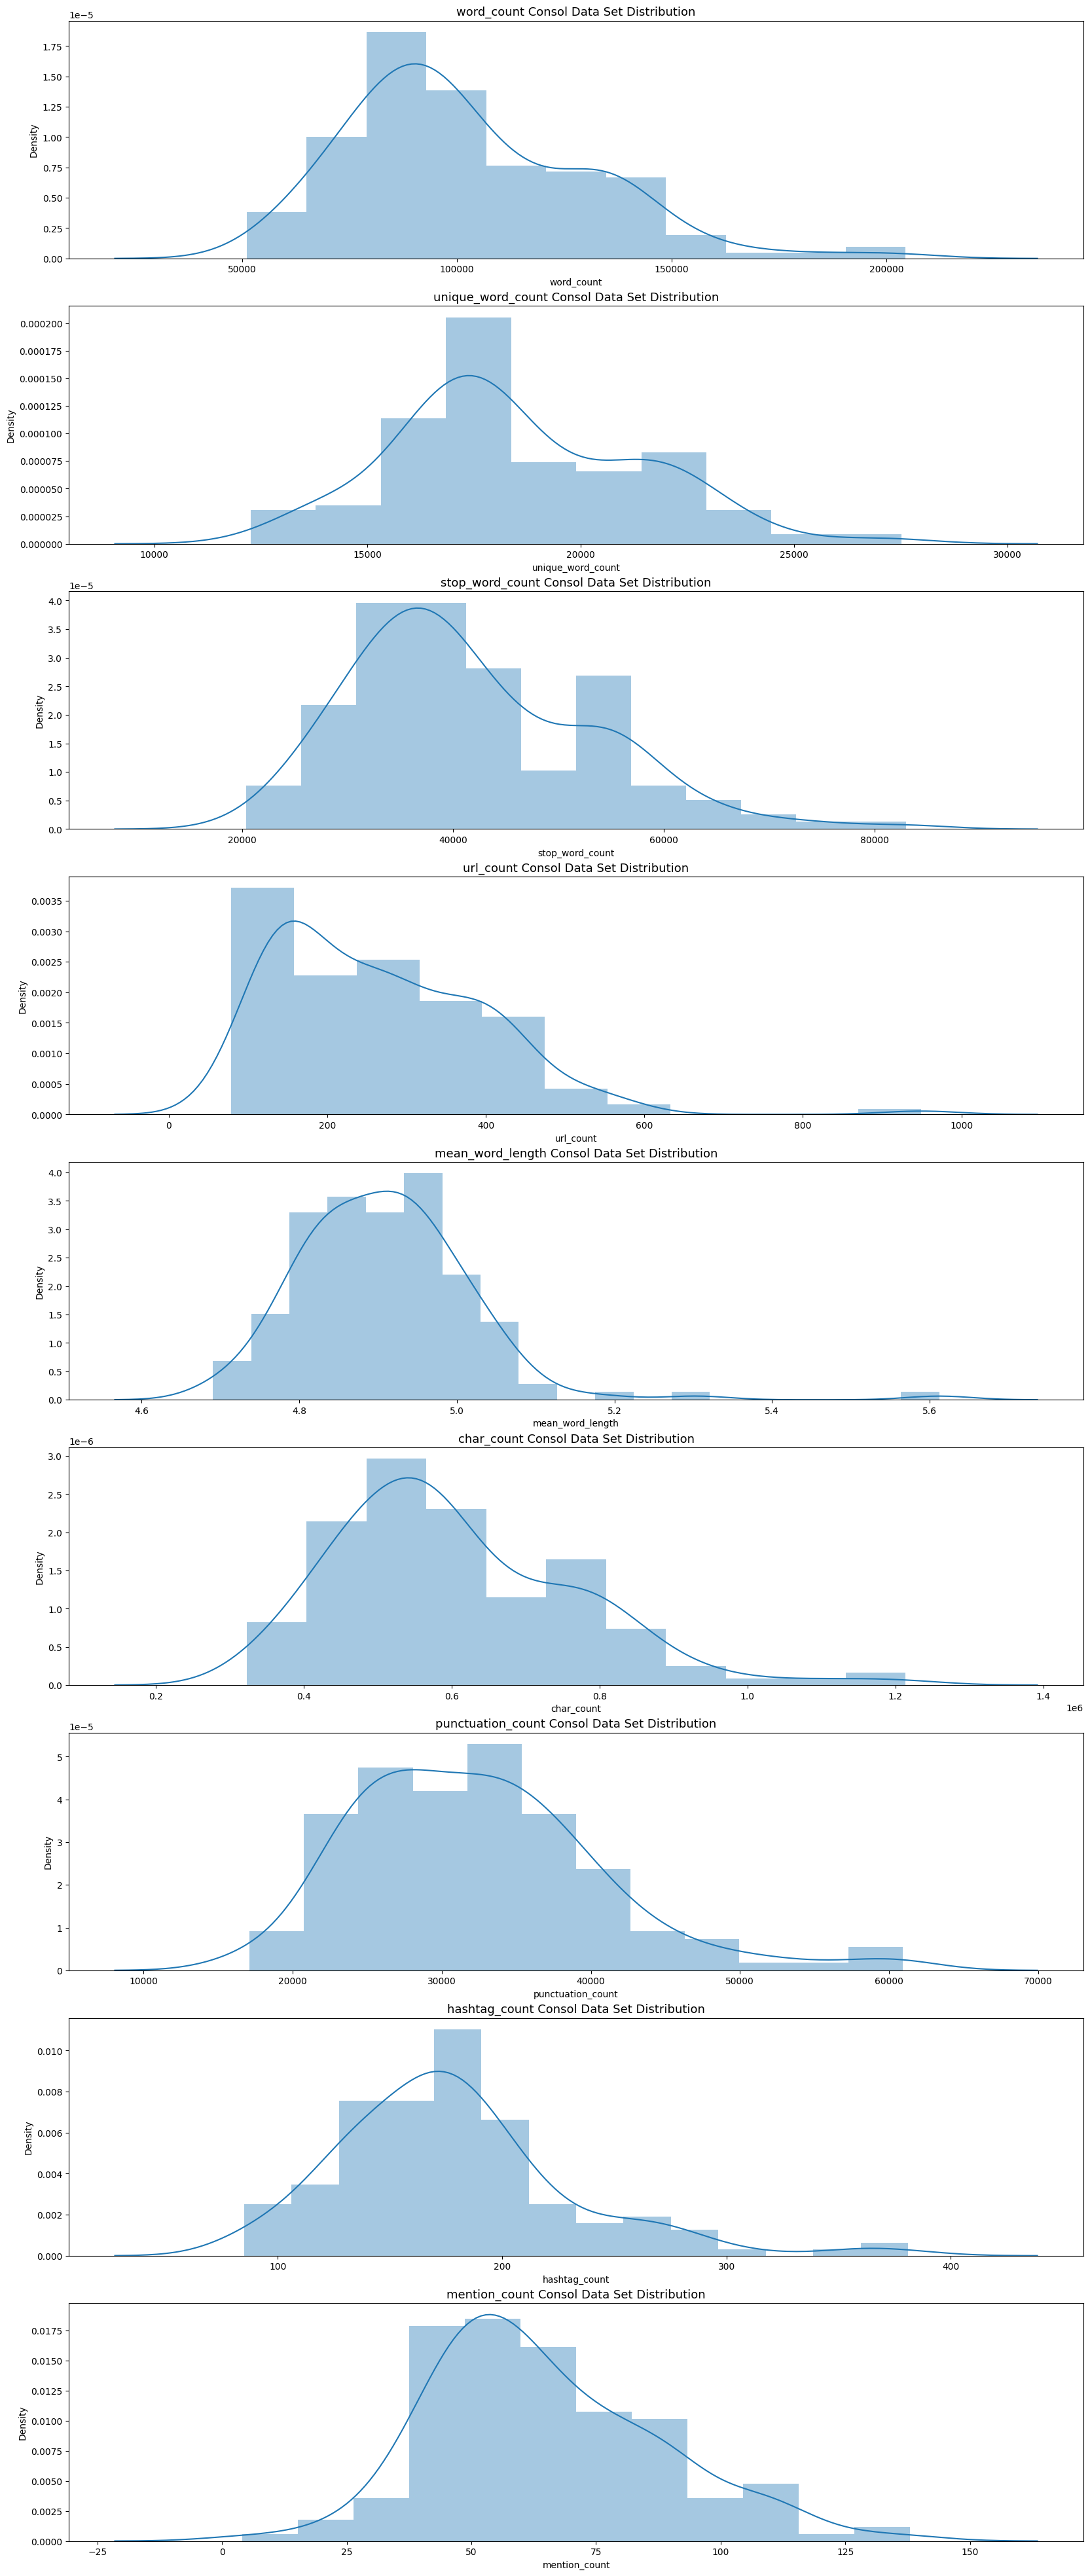

In [9]:
import warnings
warnings.filterwarnings("ignore")

# visualisation of meta features

fig, axes = plt.subplots(ncols=1, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):

    sns.distplot(train_df[feature], label='Consol', ax=axes[i])

    axes[i].set_title(f'{feature} Consol Data Set Distribution', fontsize=13)

plt.show()

## 3.2. Embeddings coverage

In [10]:
#Load the 2 popular embedding
#glove
#fasttext

fasttext_embeddings = np.load('/content/drive/MyDrive/Colab Notebooks/Embeddings/crawl-300d-2M-002-001.pkl', allow_pickle=True)
glove_embeddings = np.load('/content/drive/MyDrive/Colab Notebooks/Embeddings/glove.840B.300d-001-002.pkl', allow_pickle=True)

In [11]:
# Embeddings Coverage

# break the comments into words
# vocab is the unique words in the text data
def build_vocab(X):

    comments = X.apply(lambda s: s.split()).values
    vocab = {}

    for comment in comments:
        for word in comment:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab


def check_embeddings_coverage(X, embeddings):

    vocab = build_vocab(X)

    covered = {}
    oov = {}
    n_covered = 0
    n_oov = 0

    for word in vocab:
        try:
            covered[word] = embeddings[word] #函式嘗試將當前單詞加入到covered中，如果該單詞可以在embeddings中找到對應的向量
            n_covered += vocab[word]
        except:
            oov[word] = vocab[word] # 否則，函式將當前單詞加入到oov中，表示該單詞未被涵蓋
            n_oov += vocab[word]

    #calculate the coverage
    vocab_coverage = len(covered) / len(vocab)
    text_coverage = (n_covered / (n_covered + n_oov))

    # 函式將oov字典按照值（即未涵蓋的單詞數量）進行排序，並以元祖列表的形式返回
    sorted_oov = sorted(oov.items(), key=operator.itemgetter(1))[::-1]
    return sorted_oov, vocab_coverage, text_coverage

consol_glove_oov, consol_glove_vocab_coverage, consol_glove_text_coverage = check_embeddings_coverage(train_df['comments'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Consol Set'.format(consol_glove_vocab_coverage, consol_glove_text_coverage))

consol_fasttext_oov, consol_fasttext_vocab_coverage, consol_fasttext_text_coverage = check_embeddings_coverage(train_df['comments'], fasttext_embeddings)
print('FastText Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Consol Set'.format(consol_fasttext_vocab_coverage, consol_fasttext_text_coverage))

GloVe Embeddings cover 26.47% of vocabulary and 86.95% of text in Consol Set
FastText Embeddings cover 27.97% of vocabulary and 89.04% of text in Consol Set


In [12]:
# generating the oov
# The purpose of generating Out-of-Vocabulary (OOV) embeddings using FastText is to provide vector representations
# - for words that are not present in the original vocabulary of the pre-trained FastText model.
# combination of character n-grams, which allows it to
# - capture the meaning of words even if they are out-of-vocabulary or misspelled.
# OOV words can negatively impact the performance of the model, and having embeddings
# - for these words can help improve the accuracy and robustness of the model.

# lump the 2 oov list as one
mergedlist = consol_glove_oov + consol_fasttext_oov

# 將新列表轉換為集合，這將刪除重複的元素
unique_set = set(mergedlist)

# 將集合轉換為列表，以便返回
total_oov = list(unique_set)
df_total_oov = pd.DataFrame(total_oov, columns = ['oov', 'oov_counts'])

# sort the oov frequency
df_total_oov_sorted = df_total_oov.sort_values(by='oov_counts', ascending=False)

# Reset the index to maintain the original order
df_total_oov_sorted = df_total_oov_sorted.reset_index(drop=True)
df_total_oov_sorted

# save as new CSV
df_total_oov_sorted.to_csv('total_oov.csv')

print(f"The counts of records in Glove OOV list is {len(consol_glove_oov)}")
print(f"The counts of records in Fasttest OOV list is {len(consol_fasttext_oov)}")
print(f"The counts of records in Total OOV list is {len(total_oov)}")


The counts of records in Glove OOV list is 379465
The counts of records in Fasttest OOV list is 371721
The counts of records in Total OOV list is 387875


## 3.3. N-gram analysis (for sentiment analysis)

In [13]:
# 3. Ngrams(rank Ngrams in both labels)
# understand the info of Ngrams
# provide hints on text structure

def generate_ngrams(text, n_gram=1):
    # tokenisation
    # convert to lower case
    # split words based on spaces.
    # filter out empty tokens and stopwords
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]

    # grouping tokens to form n-grams
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    # joins the tokens within each ngram using the ' ' separator and as 1 string
    return [' '.join(ngram) for ngram in ngrams]

# visualisation how long of N-grams
N = 100

# Unigrams
consol_unigrams = defaultdict(int)

for cmt in train_df['comments']:
    for word in generate_ngrams(cmt):
        consol_unigrams[word] += 1

df_unigrams = pd.DataFrame(sorted(consol_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
consol_bigrams = defaultdict(int)

for cmt in train_df['comments']:
    for word in generate_ngrams(cmt, n_gram=2):
        consol_bigrams[word] += 1

df_bigrams = pd.DataFrame(sorted(consol_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
consol_trigrams = defaultdict(int)

for cmt in train_df['comments']:
    for word in generate_ngrams(cmt, n_gram=3):
        consol_trigrams[word] += 1

df_trigrams = pd.DataFrame(sorted(consol_trigrams.items(), key=lambda x: x[1])[::-1])

df_unigrams

,0,1
0,will,64549
1,going,38573
2,go,37863
3,market,36782
4,puts,34573
...,...,...
537982,"week.""\n\ni",1
537983,peers\*,1
537984,\*giggles,1
537985,dataa.,1


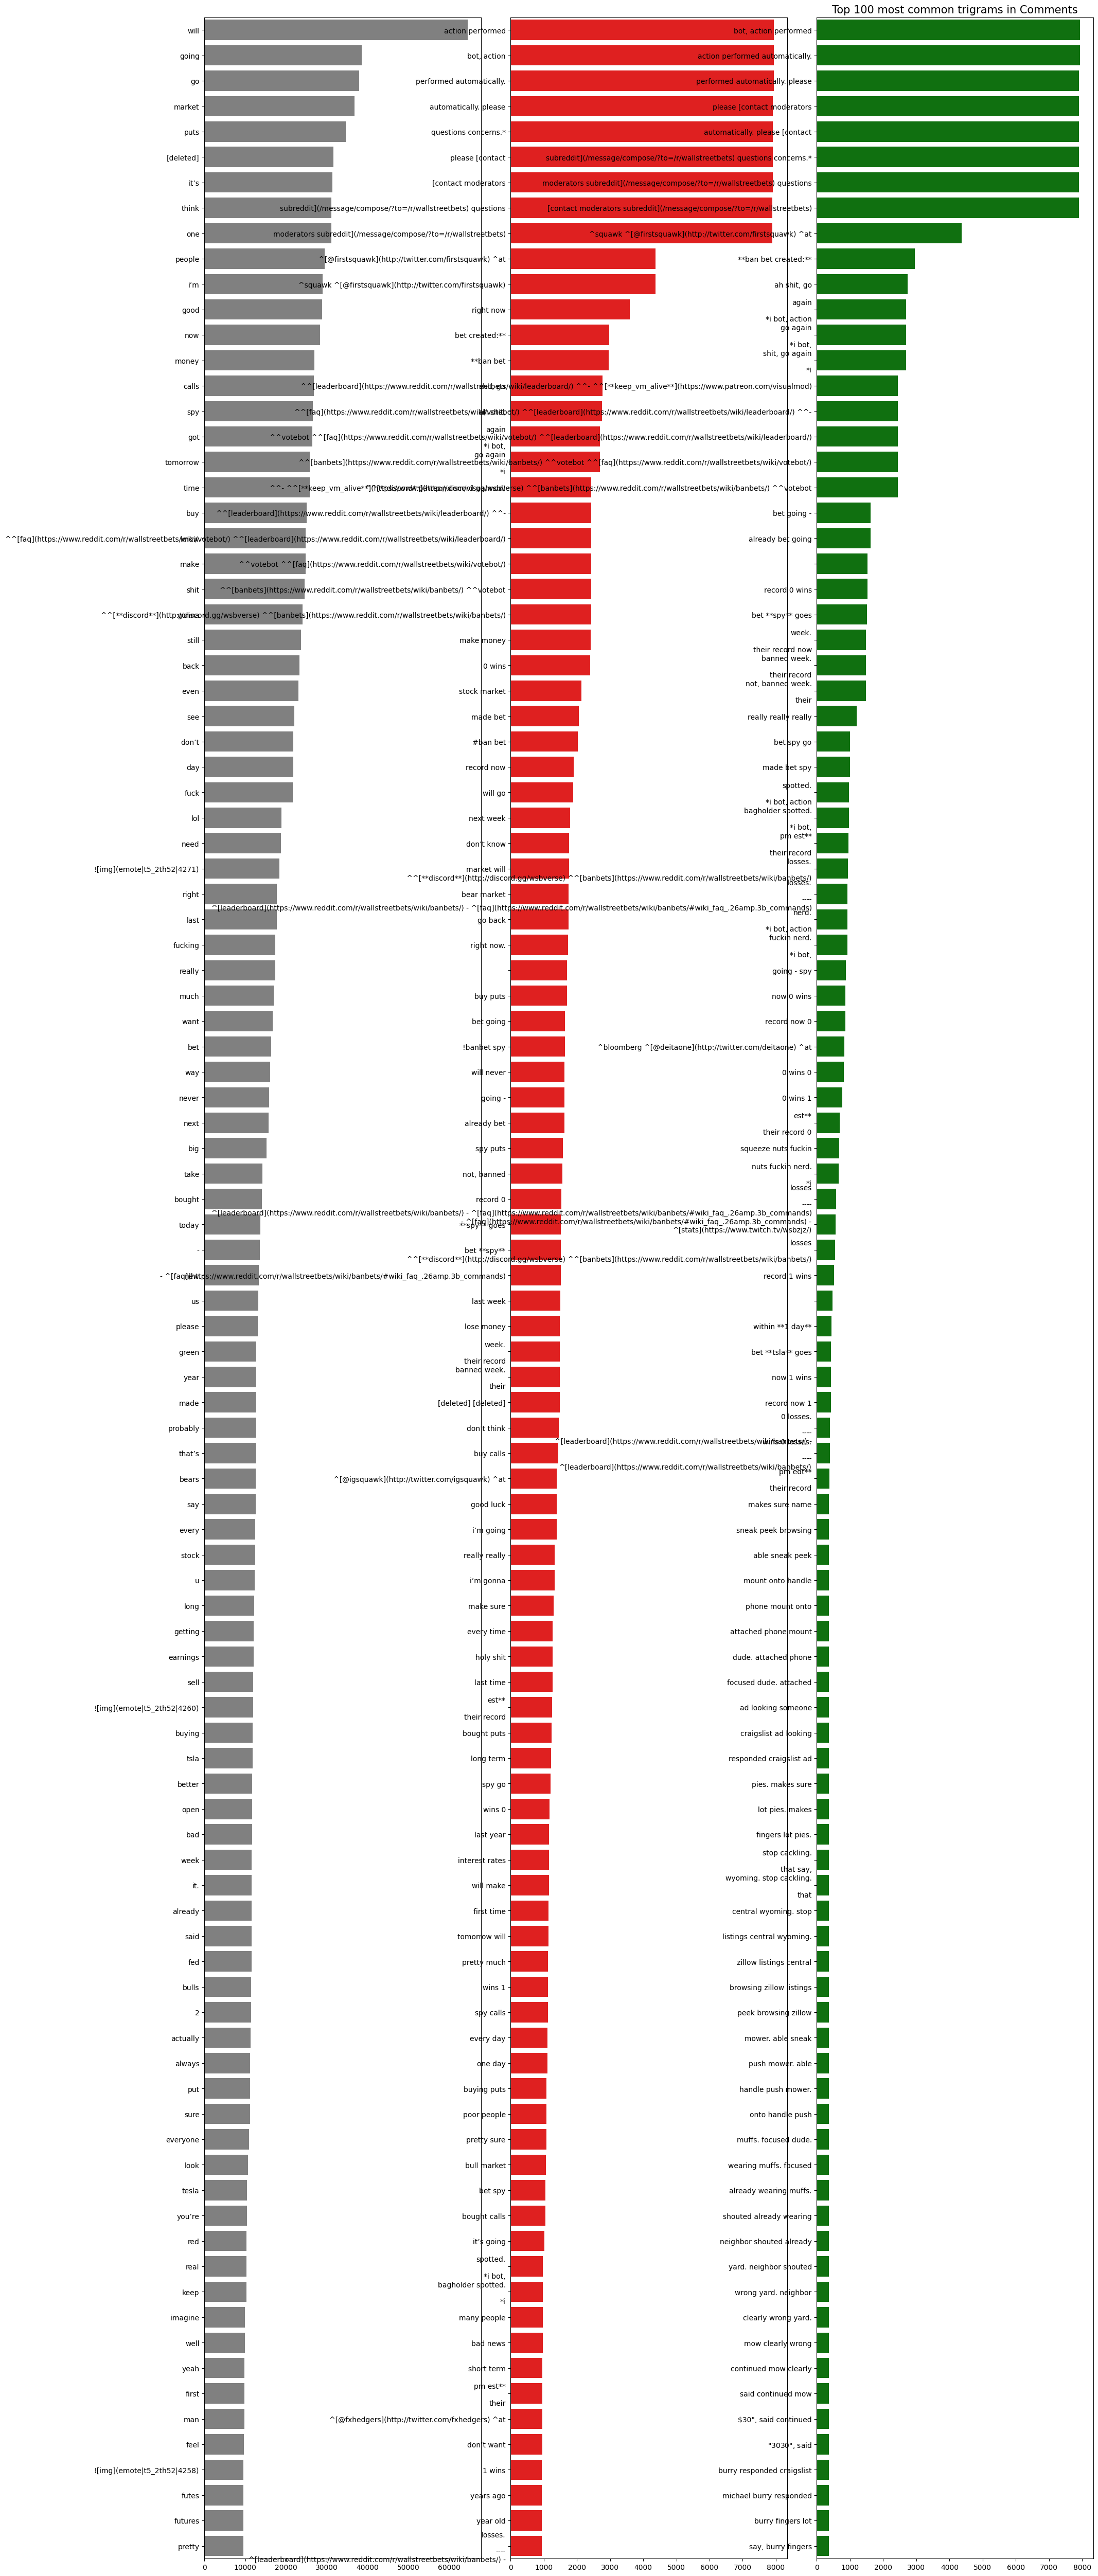

In [14]:
# 3. Ngrams
# visualisation for Unigrams
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 50), dpi=100)
plt.tight_layout()

# 繪製條形圖
sns.barplot(y=df_unigrams[0].values[:N], x=df_unigrams[1].values[:N], ax=axes[0], color='gray')
plt.title(f'Top {N} most common unigrams in Comments', fontsize=15)

sns.barplot(y=df_bigrams[0].values[:N], x=df_bigrams[1].values[:N], ax=axes[1], color='red')
plt.title(f'Top {N} most common bigrams in Comments', fontsize=15)

sns.barplot(y=df_trigrams[0].values[:N], x=df_trigrams[1].values[:N], ax=axes[2], color='green')
plt.title(f'Top {N} most common trigrams in Comments', fontsize=15)

plt.show()

In [ ]:
# 1.4. sentiment distribution
# apply if database built can identify each comments saperately
'''
sia = SentimentIntensityAnalyzer()
#apply sentiment analysis
consol_df['sentiment'] = consol_df['comments'].apply(lambda x: sia.polarity_scores(x))

# Initialize counters for different sentiment labels
positive_count = 0
negative_count = 0
neutral_count = 0

# Count the occurrences of each sentiment label
for scores in consol_df['sentiment']:
    compound_score = scores['compound']
    if compound_score > 0.05:
        positive_count += 1
    elif compound_score < -0.05:
        negative_count += 1
    else:
        neutral_count += 1

# Calculate the relative frequencies of each sentiment label
total_count = len(consol_df)
positive_percent = positive_count / total_count
negative_percent = negative_count / total_count
neutral_percent = neutral_count / total_count

# Visualize the sentiment distribution using a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percent, negative_percent, neutral_percent]
colors = ['green', 'red', 'gray']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()
'''

"\nsia = SentimentIntensityAnalyzer()\n#apply sentiment analysis\nconsol_df['sentiment'] = consol_df['comments'].apply(lambda x: sia.polarity_scores(x))\n\n# Initialize counters for different sentiment labels\npositive_count = 0\nnegative_count = 0\nneutral_count = 0\n\n# Count the occurrences of each sentiment label\nfor scores in consol_df['sentiment']:\n    compound_score = scores['compound']\n    if compound_score > 0.05:\n        positive_count += 1\n    elif compound_score < -0.05:\n        negative_count += 1\n    else:\n        neutral_count += 1\n\n# Calculate the relative frequencies of each sentiment label\ntotal_count = len(consol_df)\npositive_percent = positive_count / total_count\nnegative_percent = negative_count / total_count\nneutral_percent = neutral_count / total_count\n\n# Visualize the sentiment distribution using a pie chart\nlabels = ['Positive', 'Negative', 'Neutral']\nsizes = [positive_percent, negative_percent, neutral_percent]\ncolors = ['green', 'red', 'gra

In [ ]:
# 1.5. topic distribution (topic modeling algorithms (e.g., LDA, NMF))
# unsupervised classificaton
# apply if database built can identify each comments saperately
'''
'''

'\n'

In [15]:
# market data inspection
#load excel - market data
df_SP500 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CUSCS/CUSCS - final project/data/df_NQ_1Jul22-30Jun23.csv")
df_SP500['date'] = pd.to_datetime(df_SP500['date'], format='%Y/%m/%d').dt.strftime('%Y-%m-%d')

df_NQ = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CUSCS/CUSCS - final project/data/df_SP_1Jul22-30Jun23.csv")
df_NQ['date'] = pd.to_datetime(df_NQ['date'], format='%Y/%m/%d').dt.strftime('%Y-%m-%d')

df_NQ

,date,Open,High,Low,Close,Adj Close,Volume,percent_chnage,Jump,Big_Jump,Drop,Big_Drop
0,2022-07-01,3781.000000,3829.820068,3752.100098,3825.330078,3825.330078,4046950000,1.172443,0,1,0,0
1,2022-07-05,3792.610107,3832.189941,3742.060059,3831.389893,3831.389893,5076590000,1.022509,0,1,0,0
2,2022-07-06,3831.979980,3870.909912,3809.370117,3845.080078,3845.080078,4417720000,0.341862,1,0,0,0
3,2022-07-07,3858.850098,3910.629883,3858.850098,3902.620117,3902.620117,4057770000,1.134276,0,1,0,0
4,2022-07-08,3888.260010,3918.500000,3869.340088,3899.379883,3899.379883,3521620000,0.285986,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
246,2023-06-26,4344.839844,4362.060059,4328.080078,4328.819824,4328.819824,3415030000,-0.368714,0,0,1,0
247,2023-06-27,4337.359863,4384.419922,4335.000000,4378.410156,4378.410156,3573500000,0.946435,1,0,0,0
248,2023-06-28,4367.479980,4390.350098,4360.220215,4376.859863,4376.859863,3739330000,0.214766,1,0,0,0
249,2023-06-29,4374.939941,4398.390137,4371.970215,4396.439941,4396.439941,3696660000,0.491435,1,0,0,0


In [16]:
df_NQ.describe()

,Open,High,Low,Close,Adj Close,Volume,percent_chnage,Jump,Big_Jump,Drop,Big_Drop
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,251.000000,251.000000,251.000000,251.000000
mean,4005.648083,4034.553468,3978.338086,4008.754272,4008.754272,4.238849e+09,0.080315,0.330677,0.175299,0.366534,0.127490
std,179.806328,174.632668,186.538332,182.166402,182.166402,7.831846e+08,1.024761,0.471397,0.380982,0.482820,0.334187
min,3520.370117,3608.340088,3491.580078,3577.030029,3577.030029,1.706460e+09,-3.360063,0.000000,0.000000,0.000000,0.000000
25%,3880.944946,3908.849976,3846.770019,3893.585083,3893.585083,3.825130e+09,-0.512205,0.000000,0.000000,0.000000,0.000000
50%,4000.300049,4028.300049,3969.189941,3998.840088,3998.840088,4.084730e+09,0.025921,0.000000,0.000000,0.000000,0.000000
75%,4128.829834,4148.760009,4107.635010,4135.739991,4135.739991,4.476775e+09,0.751019,1.000000,0.000000,1.000000,0.000000
max,4440.950195,4458.479980,4422.439941,4450.379883,4450.379883,9.354280e+09,4.247843,1.000000,1.000000,1.000000,1.000000


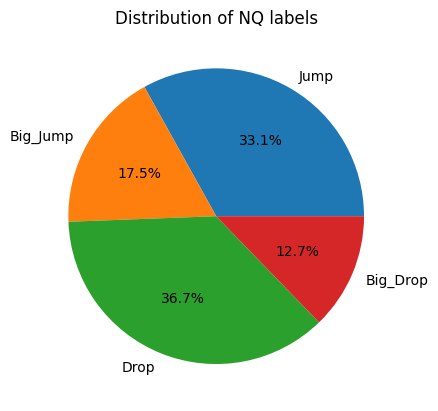

In [17]:
# market data inspection

# NQ distribution

NQ_labels = df_NQ.columns[-4:]

# Calculate the sum of each column
column_sums = df_NQ[NQ_labels].sum()

# Create a pie chart with the column sums as the data
plt.pie(column_sums, labels=NQ_labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Distribution of NQ labels')

plt.show()  # Display the pie chart

In [18]:
df_SP500.describe()

,Open,High,Low,Close,Adj Close,Volume,percent_chnage,Jump,Big_Jump,Drop,Big_Drop
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,251.000000,251.000000,251.000000,251.000000
mean,11714.171805,11822.737192,11616.425836,11728.021340,11728.021340,4.898696e+09,0.121288,0.270916,0.270916,0.270916,0.187251
std,833.916587,826.634417,849.567562,843.213554,843.213554,7.174876e+08,1.283954,0.445321,0.445321,0.445321,0.390892
min,10131.820310,10393.219730,10088.830080,10213.290040,10213.290040,2.184080e+09,-3.922809,0.000000,0.000000,0.000000,0.000000
25%,11048.089845,11201.304685,10979.229980,11121.000000,11121.000000,4.433565e+09,-0.690171,0.000000,0.000000,0.000000,0.000000
50%,11640.370120,11733.799800,11514.740230,11635.309570,11635.309570,4.792140e+09,0.058841,0.000000,0.000000,0.000000,0.000000
75%,12185.360350,12238.369630,12084.544920,12195.135255,12195.135255,5.191510e+09,1.081074,1.000000,1.000000,1.000000,0.000000
max,13859.070310,13864.059570,13716.160160,13787.919920,13787.919920,8.076530e+09,5.105993,1.000000,1.000000,1.000000,1.000000


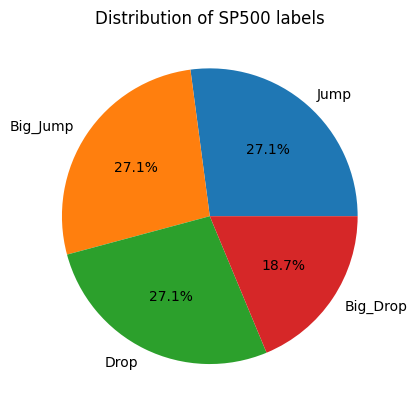

In [19]:
# market data inspection

# SP500 distribution

SP_labels = df_SP500.columns[-4:]

# Calculate the sum of each column
column_sums = df_SP500[SP_labels].sum()

# Create a pie chart with the column sums as the data
plt.pie(column_sums, labels=SP_labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Distribution of SP500 labels')

plt.show()  # Display the pie chart

##4. map to labels

In [21]:
# concatenate with SP500

concat_Reddit_SP500_df = pd.merge(consol_df, df_SP500, on='date', how='inner')
concat_Reddit_SP500_df

,date,comments,Open,High,Low,Close,Adj Close,Volume,percent_chnage,Jump,Big_Jump,Drop,Big_Drop
0,2022-07-13,This week's [Earnings Thread](https://www.redd...,11056.54980,11325.66992,11031.26953,11247.58008,11247.58008,4433060000,1.727757,0,1,0,0
1,2022-07-14,This week's [Earnings Thread](https://www.redd...,11151.20996,11279.96973,11005.92969,11251.19043,11251.19043,4481070000,0.896589,1,0,0,0
2,2022-07-15,Cashed out up 56k today. Now cuddled up watchi...,11379.36035,11454.69043,11295.33008,11452.41992,11452.41992,4369060000,0.642036,1,0,0,0
3,2022-07-19,This week's [Earnings Thread](https://www.redd...,11515.00000,11721.21973,11448.96973,11713.15039,11713.15039,5302740000,1.720802,0,1,0,0
4,2022-07-20,If 2008 was the Great Recession\n\nThen 2022 i...,11726.08984,11939.95996,11703.36035,11897.65039,11897.65039,5467080000,1.463067,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2023-06-26,I was holding puts over the weekend. Thought f...,13468.74023,13573.57031,13334.41992,13335.78027,13335.78027,4430600000,-0.987174,0,0,1,0
187,2023-06-27,I watched TSLA rise for 3 months. 3 months. 3 ...,13389.25000,13578.79980,13366.96973,13555.66992,13555.66992,5053660000,1.242937,0,1,0,0
188,2023-06-28,Trades when I 15x: $300 invested\n\nTrades whe...,13506.01953,13654.13965,13495.73047,13591.75000,13591.75000,4533270000,0.634757,1,0,0,0
189,2023-06-29,That closing green candle was like a 5 trillio...,13592.36035,13618.53027,13540.25977,13591.33008,13591.33008,4388140000,-0.007580,0,0,1,0


In [22]:
# concatenate with NQ

concat_Reddit_df = pd.merge(concat_Reddit_SP500_df, df_NQ, on='date', how='inner')
concat_Reddit_df

,date,comments,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,percent_chnage_x,Jump_x,...,High_y,Low_y,Close_y,Adj Close_y,Volume_y,percent_chnage_y,Jump_y,Big_Jump_y,Drop_y,Big_Drop_y
0,2022-07-13,This week's [Earnings Thread](https://www.redd...,11056.54980,11325.66992,11031.26953,11247.58008,11247.58008,4433060000,1.727757,0,...,3829.439941,3759.070068,3801.780029,3801.780029,4109390000,0.584975,1,0,0,0
1,2022-07-14,This week's [Earnings Thread](https://www.redd...,11151.20996,11279.96973,11005.92969,11251.19043,11251.19043,4481070000,0.896589,1,...,3796.409912,3721.560059,3790.379883,3790.379883,4199690000,0.701115,1,0,0,0
2,2022-07-15,Cashed out up 56k today. Now cuddled up watchi...,11379.36035,11454.69043,11295.33008,11452.41992,11452.41992,4369060000,0.642036,1,...,3863.620117,3817.179932,3863.159912,3863.159912,4143800000,1.182816,0,1,0,0
3,2022-07-19,This week's [Earnings Thread](https://www.redd...,11515.00000,11721.21973,11448.96973,11713.15039,11713.15039,5302740000,1.720802,0,...,3939.810059,3860.729980,3936.689941,3936.689941,4041070000,1.967503,0,1,0,0
4,2022-07-20,If 2008 was the Great Recession\n\nThen 2022 i...,11726.08984,11939.95996,11703.36035,11897.65039,11897.65039,5467080000,1.463067,0,...,3974.129883,3922.030029,3959.899902,3959.899902,4185300000,0.624596,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2023-06-26,I was holding puts over the weekend. Thought f...,13468.74023,13573.57031,13334.41992,13335.78027,13335.78027,4430600000,-0.987174,0,...,4362.060059,4328.080078,4328.819824,4328.819824,3415030000,-0.368714,0,0,1,0
187,2023-06-27,I watched TSLA rise for 3 months. 3 months. 3 ...,13389.25000,13578.79980,13366.96973,13555.66992,13555.66992,5053660000,1.242937,0,...,4384.419922,4335.000000,4378.410156,4378.410156,3573500000,0.946435,1,0,0,0
188,2023-06-28,Trades when I 15x: $300 invested\n\nTrades whe...,13506.01953,13654.13965,13495.73047,13591.75000,13591.75000,4533270000,0.634757,1,...,4390.350098,4360.220215,4376.859863,4376.859863,3739330000,0.214766,1,0,0,0
189,2023-06-29,That closing green candle was like a 5 trillio...,13592.36035,13618.53027,13540.25977,13591.33008,13591.33008,4388140000,-0.007580,0,...,4398.390137,4371.970215,4396.439941,4396.439941,3696660000,0.491435,1,0,0,0


In [23]:
# save a copy of data set
#out put in this process

concat_Reddit_df.to_csv("concat_Reddit_df.csv")